MY DATALOADER

In [138]:
import os
import torch
import numpy as np
import torchvision
import matplotlib.pyplot as plt # for plotting images
from torchvision import datasets, transforms , utils

class MyDataLoader:
    def __init__(self, data_path, batch_size):
        self.trans = transforms.Compose([transforms.ToTensor(),]) # Converting input image into pytorch tensor

        # defining dataset destination and batch size
        self.data_path = data_path
        self.batch_size = batch_size

        self.data = datasets.ImageFolder(root=self.data_path, transform=self.trans) # Transformed dataset with each class in separate folders 
        
        self.dataloader = torch.utils.data.DataLoader(self.data, batch_size=self.batch_size, shuffle=True, drop_last=True) # Loading dataset with specific batch size, also shuffle and drop the last used images
# Making dataloader iterable
    def __iter__(self): 
        return iter(self.dataloader)
# For next batch of datasets
    def __next__(self):
        return next(self.dataloader)

WORKING EXAMPLE

In [139]:
if __name__ == "__main__":
    data_path = "D:/EMAN/Desktop/DL/train/" #Path of dataset directory
    No_of_batches = 3  #Number of batches
    batch_size = 3  #Number of images per batch
    data_loader = MyDataLoader(data_path, batch_size) #Calling the data loader
    for i in range(No_of_batches):  
        images, class_no = next(iter(data_loader))
        print(f"Batch {i+1}:", class_no)  #print the batch number with the labels as number 0, 1 and 2 respectively

Batch 1: tensor([2, 2, 1])
Batch 2: tensor([2, 1, 2])
Batch 3: tensor([1, 0, 1])


FOR SHOWING IMAGES (Verification)

Batch 1: tensor([0, 0, 1])


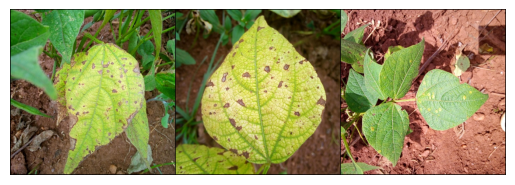

Batch 2: tensor([2, 0, 0])


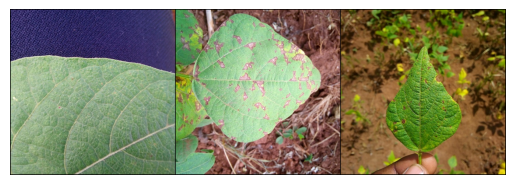

Batch 3: tensor([1, 2, 0])


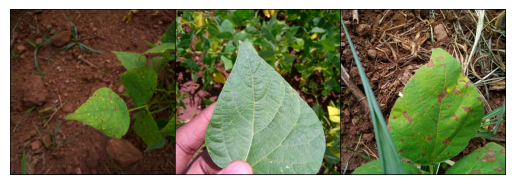

In [140]:
for i in range(No_of_batches):  
    images, class_no = next(iter(data_loader))
    print(f"Batch {i+1}:", class_no)
    plt.imshow(torchvision.utils.make_grid(images, nrow=len(images)).permute(1, 2, 0))
    plt.axis('off')
    plt.show()